### Music data cleaning-wrangling-sql

In [1]:
import pprint
import sys
import json
import spotipy
import spotipy.util as util
import pprint
import pandas as pd
from pandas.io.json import json_normalize
import math
import time
import numpy as np
import ast

In [2]:
# display all columns without jupyter notebook limitation

pd.options.display.max_columns = None

In [3]:
username = 'nerken'

In [4]:
track_data = pd.read_csv(username+'_track_all_data.csv')
playlist_data = pd.read_csv(username+'_user_playlists.csv')

In [5]:
Albums = pd.DataFrame()
Artists = pd.DataFrame()
Songs = pd.DataFrame()
Playlists = pd.DataFrame()
Lyrics = pd.DataFrame()

In [6]:
track_data = track_data.drop(columns=['Unnamed: 0'],axis=1)
playlist_data = playlist_data.drop(columns=['Unnamed: 0'],axis=1)

In [7]:
track_data.head()

,added_at,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,is_local,playlist_id,primary_color,track.album.album_type,track.album.artists,track.album.available_markets,track.album.external_urls.spotify,track.album.href,track.album.id,track.album.images,track.album.name,track.album.release_date,track.album.release_date_precision,track.album.total_tracks,track.album.type,track.album.uri,track.artists,track.available_markets,track.disc_number,track.duration_ms,track.episode,track.explicit,track.external_ids.isrc,track.external_urls.spotify,track.href,track.id,track.is_local,track.linked_from.external_urls.spotify,track.linked_from.href,track.linked_from.id,track.linked_from.type,track.linked_from.uri,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,video_thumbnail.url,tracks_features.danceability,tracks_features.energy,tracks_features.key,tracks_features.loudness,tracks_features.mode,tracks_features.speechiness,tracks_features.acousticness,tracks_features.instrumentalness,tracks_features.liveness,tracks_features.valence,tracks_features.tempo,tracks_features.type,tracks_features.id,tracks_features.uri,tracks_features.track_href,tracks_features.analysis_url,tracks_features.duration_ms,tracks_features.time_signature
0,2018-10-24T14:52:55Z,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,False,3ypuzkCtKGOQ0Y63x295Jx,NaN,compilation,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",https://open.spotify.com/album/5VOdrHq3pi0FTHQ...,https://api.spotify.com/v1/albums/5VOdrHq3pi0F...,5VOdrHq3pi0FTHQZtBaj7V,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Electro Swing Fever, Vol. 3",2014-02-17,day,60.0,album,spotify:album:5VOdrHq3pi0FTHQZtBaj7V,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1.0,181000.0,False,False,FR6F31402670,https://open.spotify.com/track/3wD62ofDBqgeJSW...,https://api.spotify.com/v1/tracks/3wD62ofDBqge...,3wD62ofDBqgeJSW2u7WKil,False,NaN,NaN,NaN,NaN,NaN,Ragtime Cat (feat. Lilja Bloom),21.0,https://p.scdn.co/mp3-preview/973b9b1ff20c6eba...,True,1.0,track,spotify:track:3wD62ofDBqgeJSW2u7WKil,NaN,0.736,0.715,5,-4.114,0,0.0412,0.01200,0.000796,0.218,0.851,119.976,audio_features,3wD62ofDBqgeJSW2u7WKil,spotify:track:3wD62ofDBqgeJSW2u7WKil,https://api.spotify.com/v1/tracks/3wD62ofDBqge...,https://api.spotify.com/v1/audio-analysis/3wD6...,181000,4
1,2018-10-24T14:52:55Z,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,False,3ypuzkCtKGOQ0Y63x295Jx,NaN,compilation,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",https://open.spotify.com/album/5VOdrHq3pi0FTHQ...,https://api.spotify.com/v1/albums/5VOdrHq3pi0F...,5VOdrHq3pi0FTHQZtBaj7V,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Electro Swing Fever, Vol. 3",2014-02-17,day,60.0,album,spotify:album:5VOdrHq3pi0FTHQZtBaj7V,[{'external_urls': {'spotify': 'https://open.s...,[],1.0,265093.0,False,False,FR6F31402680,https://open.spotify.com/track/14EeHJP2ZhOqabZ...,https://api.spotify.com/v1/tracks/14EeHJP2ZhOq...,14EeHJP2ZhOqabZgCAF27r,False,NaN,NaN,NaN,NaN,NaN,Artichaut,0.0,NaN,True,2.0,track,spotify:track:14EeHJP2ZhOqabZgCAF27r,NaN,0.695,0.879,4,-5.655,1,0.1600,0.22300,0.197000,0.689,0.910,203.886,audio_features,14EeHJP2ZhOqabZgCAF27r,spotify:track:14EeHJP2ZhOqabZgCAF27r,https://api.spotify.com/v1/tracks/14EeHJP2ZhOq...,https://api.spotify.com/v1/audio-analysis/14Ee...,265093,4
2,2018-10-24T14:52:55Z,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,False,3ypuzkCtKGOQ0Y63x295Jx,NaN,compilation,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",https://open.spotify.com/album/5VOdrHq3pi0FTHQ...,https://api.spot

In [8]:
playlist_data

,collaborative,href,id,images,name,primary_color,public,snapshot_id,type,uri,external_urls.spotify,owner.display_name,owner.external_urls.spotify,owner.href,owner.id,owner.type,owner.uri,tracks.href,tracks.total
0,False,https://api.spotify.com/v1/playlists/3ypuzkCtK...,3ypuzkCtKGOQ0Y63x295Jx,"[{'height': 640, 'url': 'https://mosaic.scdn.c...","Various Artists – Electro Swing Fever, Vol. 3",NaN,True,Miw1ZmMyMjZlYzlhYTVmZWViZDA1NWIzNzVmMzdjNzc0ZT...,playlist,spotify:playlist:3ypuzkCtKGOQ0Y63x295Jx,https://open.spotify.com/playlist/3ypuzkCtKGOQ...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,https://api.spotify.com/v1/playlists/3ypuzkCtK...,60
1,False,https://api.spotify.com/v1/playlists/03aHsHAJv...,03aHsHAJv9vHySsb82CYB7,"[{'height': 640, 'url': 'https://mosaic.scdn.c...",Bishop Allen,NaN,True,OCwxOTkxZmQ5MzM0NzUyMjc3NTFjYjI3NzI4MTVhNzIyZW...,playlist,spotify:playlist:03aHsHAJv9vHySsb82CYB7,https://open.spotify.com/playlist/03aHsHAJv9vH...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,https://api.spotify.com/v1/playlists/03aHsHAJv...,85
2,False,https://api.spotify.com/v1/playlists/6uzNpJIT2...,6uzNpJIT2e1cOHVhYdg8Kr,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",ONE,NaN,True,MyxlYjI0MGViNWE2MjAzMGRmOWEwOThkYWY3NjNhYmJmNz...,playlist,spotify:playlist:6uzNpJIT2e1cOHVhYdg8Kr,https://open.spotify.com/playlist/6uzNpJIT2e1c...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,https://api.spotify.com/v1/playlists/6uzNpJIT2...,1
3,False,https://api.spotify.com/v1/playlists/7uuoJ3glh...,7uuoJ3glhbTcKGo4PzqQu8,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Various Artists – Música Clássica: Mais Famosas,NaN,True,MyxkZGQ1YjI1MmJkZmIxNmYzZDBkMzU4MTRiZDg1YTM5MG...,playlist,spotify:playlist:7uuoJ3glhbTcKGo4PzqQu8,https://open.spotify.com/playlist/7uuoJ3glhbTc...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,https://api.spotify.com/v1/playlists/7uuoJ3glh...,50
4,False,https://api.spotify.com/v1/playlists/3adsbUvUt...,3adsbUvUtQcVmqSdCpRNIH,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Nice COVERS,NaN,True,Myw2Y2FmN2FjNmYzODA1NGU4YjQzMTk2MWYwMTA1N2JlYW...,playlist,spotify:playlist:3adsbUvUtQcVmqSdCpRNIH,https://open.spotify.com/playlist/3adsbUvUtQcV...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,https://api.spotify.com/v1/playlists/3adsbUvUt...,1
5,False,https://api.spotify.com/v1/playlists/5mLQ2pzeG...,5mLQ2pzeGmEwuc7NFrsmp6,"[{'height': 640, 'url': 'https://mosaic.scdn.c...",FB,NaN,True,ODksY2UyNjhkYjgwYjk2MDc4MTNlZjBiMmJmNjg0Njg1NT...,playlist,spotify:playlist:5mLQ2pzeGmEwuc7NFrsmp6,https://open.spotify.com/playlist/5mLQ2pzeGmEw...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,https://api.spotify.com/v1/playlists/5mLQ2pzeG...,81
6,True,https://api.spotify.com/v1/playlists/7nW9BlocQ...,7nW9BlocQCzpeLwufiJ4RJ,"[{'height': 640, 'url': 'https://mosaic.scdn.c...",New Playlist,NaN,False,NCxmMWNiZjM2MmIzNzViZjViOTE1OTE4N2RhMjQxODVlMz...,playlist,spotify:playlist:7nW9BlocQCzpeLwufiJ4RJ,https://open.spotify.com/playlist/7nW9BlocQCzp...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,https://api.spotify.com/v1/playlists/7nW9BlocQ...,77
7,False,https://api.spotify.com/v1/playlists/28RqwFckD...,28RqwFckD9aUZqyksBUCKw,"[{'height': 640, 'url': 'https://mosaic.scdn.c...",Reggeton,NaN,True,Niw1OWJmYWRkNjJhYzgxNjg4NTFhYTY2MDM5OTYwNTExZW...,playlist,spotify:playlist:28RqwFckD9aUZqyksBUCKw,https://open.spotify.com/playlist/28RqwFckD9aU...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.c

In [9]:
# playlist_data['images'] = playlist_data['images'].str[1:-1]

In [10]:
playlist_data['images'][0]

"[{'height': 640, 'url': 'https://mosaic.scdn.co/640/011587aeea7675f6b8bcd2204dbdef7c96c58466774eaf41ff0c3bee8e7f7a57104aded2b7a7cf3c89b4e2faaef4dd2fca07238c4fe1c4ded7251eadd8842fb44aadb8f34c944e385b2bff667e60c77a', 'width': 640}, {'height': 300, 'url': 'https://mosaic.scdn.co/300/011587aeea7675f6b8bcd2204dbdef7c96c58466774eaf41ff0c3bee8e7f7a57104aded2b7a7cf3c89b4e2faaef4dd2fca07238c4fe1c4ded7251eadd8842fb44aadb8f34c944e385b2bff667e60c77a', 'width': 300}, {'height': 60, 'url': 'https://mosaic.scdn.co/60/011587aeea7675f6b8bcd2204dbdef7c96c58466774eaf41ff0c3bee8e7f7a57104aded2b7a7cf3c89b4e2faaef4dd2fca07238c4fe1c4ded7251eadd8842fb44aadb8f34c944e385b2bff667e60c77a', 'width': 60}]"

In [11]:
def split_to_dict(a):
    try:
        b = {}
        a = a[a.find("{")+1:a.find("}")]
        a = "{%s}" % a
        b = ast.literal_eval(a)
        return b
    except:
        return np.nan

In [12]:
playlist_data['images'] = playlist_data['images'].apply(split_to_dict)

In [13]:
playlist_data

,collaborative,href,id,images,name,primary_color,public,snapshot_id,type,uri,external_urls.spotify,owner.display_name,owner.external_urls.spotify,owner.href,owner.id,owner.type,owner.uri,tracks.href,tracks.total
0,False,https://api.spotify.com/v1/playlists/3ypuzkCtK...,3ypuzkCtKGOQ0Y63x295Jx,"{'height': 640, 'url': 'https://mosaic.scdn.co...","Various Artists – Electro Swing Fever, Vol. 3",NaN,True,Miw1ZmMyMjZlYzlhYTVmZWViZDA1NWIzNzVmMzdjNzc0ZT...,playlist,spotify:playlist:3ypuzkCtKGOQ0Y63x295Jx,https://open.spotify.com/playlist/3ypuzkCtKGOQ...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,https://api.spotify.com/v1/playlists/3ypuzkCtK...,60
1,False,https://api.spotify.com/v1/playlists/03aHsHAJv...,03aHsHAJv9vHySsb82CYB7,"{'height': 640, 'url': 'https://mosaic.scdn.co...",Bishop Allen,NaN,True,OCwxOTkxZmQ5MzM0NzUyMjc3NTFjYjI3NzI4MTVhNzIyZW...,playlist,spotify:playlist:03aHsHAJv9vHySsb82CYB7,https://open.spotify.com/playlist/03aHsHAJv9vH...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,https://api.spotify.com/v1/playlists/03aHsHAJv...,85
2,False,https://api.spotify.com/v1/playlists/6uzNpJIT2...,6uzNpJIT2e1cOHVhYdg8Kr,"{'height': 640, 'url': 'https://i.scdn.co/imag...",ONE,NaN,True,MyxlYjI0MGViNWE2MjAzMGRmOWEwOThkYWY3NjNhYmJmNz...,playlist,spotify:playlist:6uzNpJIT2e1cOHVhYdg8Kr,https://open.spotify.com/playlist/6uzNpJIT2e1c...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,https://api.spotify.com/v1/playlists/6uzNpJIT2...,1
3,False,https://api.spotify.com/v1/playlists/7uuoJ3glh...,7uuoJ3glhbTcKGo4PzqQu8,"{'height': 640, 'url': 'https://i.scdn.co/imag...",Various Artists – Música Clássica: Mais Famosas,NaN,True,MyxkZGQ1YjI1MmJkZmIxNmYzZDBkMzU4MTRiZDg1YTM5MG...,playlist,spotify:playlist:7uuoJ3glhbTcKGo4PzqQu8,https://open.spotify.com/playlist/7uuoJ3glhbTc...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,https://api.spotify.com/v1/playlists/7uuoJ3glh...,50
4,False,https://api.spotify.com/v1/playlists/3adsbUvUt...,3adsbUvUtQcVmqSdCpRNIH,"{'height': 640, 'url': 'https://i.scdn.co/imag...",Nice COVERS,NaN,True,Myw2Y2FmN2FjNmYzODA1NGU4YjQzMTk2MWYwMTA1N2JlYW...,playlist,spotify:playlist:3adsbUvUtQcVmqSdCpRNIH,https://open.spotify.com/playlist/3adsbUvUtQcV...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,https://api.spotify.com/v1/playlists/3adsbUvUt...,1
5,False,https://api.spotify.com/v1/playlists/5mLQ2pzeG...,5mLQ2pzeGmEwuc7NFrsmp6,"{'height': 640, 'url': 'https://mosaic.scdn.co...",FB,NaN,True,ODksY2UyNjhkYjgwYjk2MDc4MTNlZjBiMmJmNjg0Njg1NT...,playlist,spotify:playlist:5mLQ2pzeGmEwuc7NFrsmp6,https://open.spotify.com/playlist/5mLQ2pzeGmEw...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,https://api.spotify.com/v1/playlists/5mLQ2pzeG...,81
6,True,https://api.spotify.com/v1/playlists/7nW9BlocQ...,7nW9BlocQCzpeLwufiJ4RJ,"{'height': 640, 'url': 'https://mosaic.scdn.co...",New Playlist,NaN,False,NCxmMWNiZjM2MmIzNzViZjViOTE1OTE4N2RhMjQxODVlMz...,playlist,spotify:playlist:7nW9BlocQCzpeLwufiJ4RJ,https://open.spotify.com/playlist/7nW9BlocQCzp...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.com/v1/users/nerken,nerken,user,spotify:user:nerken,https://api.spotify.com/v1/playlists/7nW9BlocQ...,77
7,False,https://api.spotify.com/v1/playlists/28RqwFckD...,28RqwFckD9aUZqyksBUCKw,"{'height': 640, 'url': 'https://mosaic.scdn.co...",Reggeton,NaN,True,Niw1OWJmYWRkNjJhYzgxNjg4NTFhYTY2MDM5OTYwNTExZW...,playlist,spotify:playlist:28RqwFckD9aUZqyksBUCKw,https://open.spotify.com/playlist/28RqwFckD9aU...,Josep Foradada,https://open.spotify.com/user/nerken,https://api.spotify.c

In [14]:
type(playlist_data['images'][0])

dict

In [15]:
playlist_images = playlist_data['images'].apply(pd.Series)
playlist_images = playlist_images.rename(columns={"url": "Image_URL"})

In [16]:
playlists = playlist_data[['id','name','owner.display_name','tracks.total','external_urls.spotify']].copy().rename(columns={'id': 'Id','name': 'Name','owner.display_name':'Owner','tracks.total':'Total_Tracks','external_urls.spotify':'Playlist_URL'})

In [17]:
Playlists = playlists.join(playlist_images['Image_URL'])

In [18]:
Playlists

,Id,Name,Owner,Total_Tracks,Playlist_URL,Image_URL
0,3ypuzkCtKGOQ0Y63x295Jx,"Various Artists – Electro Swing Fever, Vol. 3",Josep Foradada,60,https://open.spotify.com/playlist/3ypuzkCtKGOQ...,https://mosaic.scdn.co/640/011587aeea7675f6b8b...
1,03aHsHAJv9vHySsb82CYB7,Bishop Allen,Josep Foradada,85,https://open.spotify.com/playlist/03aHsHAJv9vH...,https://mosaic.scdn.co/640/2cb93e15a296ff1cbc5...
2,6uzNpJIT2e1cOHVhYdg8Kr,ONE,Josep Foradada,1,https://open.spotify.com/playlist/6uzNpJIT2e1c...,https://i.scdn.co/image/b0530ff0004d554d4872dc...
3,7uuoJ3glhbTcKGo4PzqQu8,Various Artists – Música Clássica: Mais Famosas,Josep Foradada,50,https://open.spotify.com/playlist/7uuoJ3glhbTc...,https://i.scdn.co/image/357a1d6a7600d4dad7d329...
4,3adsbUvUtQcVmqSdCpRNIH,Nice COVERS,Josep Foradada,1,https://open.spotify.com/playlist/3adsbUvUtQcV...,https://i.scdn.co/image/3b65c4d1d69be96659f932...
5,5mLQ2pzeGmEwuc7NFrsmp6,FB,Josep Foradada,81,https://open.spotify.com/playlist/5mLQ2pzeGmEw...,https://mosaic.scdn.co/640/385e5359ea930a0d98b...
6,7nW9BlocQCzpeLwufiJ4RJ,New Playlist,Josep Foradada,77,https://open.spotify.com/playlist/7nW9BlocQCzp...,https://mosaic.scdn.co/640/299ea65f2b2187d43f7...
7,28RqwFckD9aUZqyksBUCKw,Reggeton,Josep Foradada,4,https://open.spotify.com/playlist/28RqwFckD9aU...,https://mosaic.scdn.co/640/233137d8b11be59903f...
8,17G5Gs4hjwytQt3l6mkph2,Ramon Mirabet,Josep Foradada,29,https://open.spotify.com/playlist/17G5Gs4hjwyt...,https://mosaic.scdn.co/640/0cf1da3fa7e74d17529...
9,4uBsB8VrlhHkN9Zazl0hO8,Josep Francès,Josep Foradada,4,https://open.spotify.com/playlist/4uBsB8VrlhHk...,https://mosaic.scdn.co/640/8ee9286e9e66682b56f...


In [19]:
Playlists.to_csv(username + '_playlists_clean.csv')

### Create the Album dataset

In [20]:
track_data['track.album.images'][0]

"[{'height': 640, 'url': 'https://i.scdn.co/image/011587aeea7675f6b8bcd2204dbdef7c96c58466', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/6188952b76cfdf60e3f1358c4aedaa1f6912bc50', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/969fb2f6c93268301a6d88897d7dcea614fce10e', 'width': 64}]"

In [21]:
track_data['track.album.images'] = track_data['track.album.images'].apply(split_to_dict)

In [22]:
album_images = track_data['track.album.images'].apply(pd.Series)
album_images = album_images.rename(columns={"url": "Image_URL"})

In [23]:
Albums = track_data[['track.album.id','track.album.name','track.album.release_date','track.album.total_tracks','track.album.external_urls.spotify']].copy().rename(columns={'track.album.id': 'Id','track.album.name': 'Name','track.album.release_date':'Release_Date','track.album.total_tracks':'Total_Tracks','track.album.external_urls.spotify':'Album_URL'})

In [24]:
Albums = Albums.join(album_images['Image_URL'])

In [25]:
Albums.isna().sum()

Id              0
Name            1
Release_Date    0
Total_Tracks    0
Album_URL       0
Image_URL       1
dtype: int64

In [26]:
Albums[Albums.isnull().any(axis=1)]

,Id,Name,Release_Date,Total_Tracks,Album_URL,Image_URL
1025,4aTXGVbuN9U1eM4Suce4w8,NaN,2010-07-06,13.0,https://open.spotify.com/album/4aTXGVbuN9U1eM4...,NaN


In [27]:
Albums = Albums.drop_duplicates()
Albums.shape

(651, 6)

In [28]:
Albums.pivot_table(index=['Id'], aggfunc='size')

Id
00BsknzDhYLHEIjzgvL3Z7    1
00XMrHZoOsYLmiyx890axX    1
019W9SmD7B6UJrVmYAamuj    1
02g2io3DYIwKid6WytSfcr    1
02h9kO2oLKnLtycgbElKsw    1
                         ..
7ydFJUb1tmZPd6p4xIe10V    1
7ykWEOYdt8gyA4seOlwtWK    1
7ynKEunH8LSit4TR3foMVC    1
7zoOKu64bKQjUGNb39hiFf    1
7zt7vhLaqKhVuR08UZSwNP    1
Length: 651, dtype: int64

In [29]:
Albums = Albums.reset_index(drop=True)

In [33]:
Albums.head()

,Id,Name,Release_Date,Total_Tracks,Album_URL,Image_URL
0,5VOdrHq3pi0FTHQZtBaj7V,"Electro Swing Fever, Vol. 3",2014-02-17,60.0,https://open.spotify.com/album/5VOdrHq3pi0FTHQ...,https://i.scdn.co/image/011587aeea7675f6b8bcd2...
1,1D4pWDyvBQeq4x4UKTVvuI,Charm School,2003-01-01,13.0,https://open.spotify.com/album/1D4pWDyvBQeq4x4...,https://i.scdn.co/image/6ce0d60b930b8c1525d8df...
2,7qscw1Uae7FHpSse64nqd1,EP Collection Vol. 2,2007-01-01,18.0,https://open.spotify.com/album/7qscw1Uae7FHpSs...,https://i.scdn.co/image/2cb93e15a296ff1cbc5b78...
3,57u3M2Dw4I9omyqzGOhbjQ,EP Collection Vol. 1,2007-01-01,17.0,https://open.spotify.com/album/57u3M2Dw4I9omyq...,https://i.scdn.co/image/6bcefa5480fc9abc86eec1...
4,2fAA87YxwDh8sofZrwz6Wd,The Broken String,2007-07-24,12.0,https://open.spotify.com/album/2fAA87YxwDh8sof...,https://i.scdn.co/image/96751c3485d2cecd461502...


In [36]:
Albums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 6 columns):
Id              651 non-null object
Name            650 non-null object
Release_Date    651 non-null object
Total_Tracks    651 non-null float64
Album_URL       651 non-null object
Image_URL       650 non-null object
dtypes: float64(1), object(5)
memory usage: 30.6+ KB


In [41]:
Albums['Release_Date'] = pd.to_datetime(Albums['Release_Date'])

In [43]:
Albums.head()

,Id,Name,Release_Date,Total_Tracks,Album_URL,Image_URL
0,5VOdrHq3pi0FTHQZtBaj7V,"Electro Swing Fever, Vol. 3",2014-02-17,60.0,https://open.spotify.com/album/5VOdrHq3pi0FTHQ...,https://i.scdn.co/image/011587aeea7675f6b8bcd2...
1,1D4pWDyvBQeq4x4UKTVvuI,Charm School,2003-01-01,13.0,https://open.spotify.com/album/1D4pWDyvBQeq4x4...,https://i.scdn.co/image/6ce0d60b930b8c1525d8df...
2,7qscw1Uae7FHpSse64nqd1,EP Collection Vol. 2,2007-01-01,18.0,https://open.spotify.com/album/7qscw1Uae7FHpSs...,https://i.scdn.co/image/2cb93e15a296ff1cbc5b78...
3,57u3M2Dw4I9omyqzGOhbjQ,EP Collection Vol. 1,2007-01-01,17.0,https://open.spotify.com/album/57u3M2Dw4I9omyq...,https://i.scdn.co/image/6bcefa5480fc9abc86eec1...
4,2fAA87YxwDh8sofZrwz6Wd,The Broken String,2007-07-24,12.0,https://open.spotify.com/album/2fAA87YxwDh8sof...,https://i.scdn.co/image/96751c3485d2cecd461502...


In [40]:
Albums['Release_Date'].unique()

array(['2014-02-17T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2007-07-24T00:00:00.000000000',
       '2009-03-10T00:00:00.000000000', '2014-08-19T00:00:00.000000000',
       '2012-10-01T00:00:00.000000000', '2012-07-10T00:00:00.000000000',
       '2015-10-16T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-10-13T00:00:00.000000000', '2014-05-05T00:00:00.000000000',
       '2005-03-30T00:00:00.000000000', '2007-10-08T00:00:00.000000000',
       '2001-06-15T00:00:00.000000000', '2011-10-10T00:00:00.000000000',
       '2014-05-27T00:00:00.000000000', '2016-10-21T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2011-02-25T00:00:00.000000000',
       '2010-11-22T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2006-03-20T00:00:00.000000000', '2009-03-11T00:00:00.000000000',
       '2011-03-17T00:00:00.000000000', '2012-03-26T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2004-01-01

In [38]:
Albums.to_csv(username + '_user_albums.csv')

In [51]:
import seaborn as sns

In [56]:
sns.set(style="ticks")

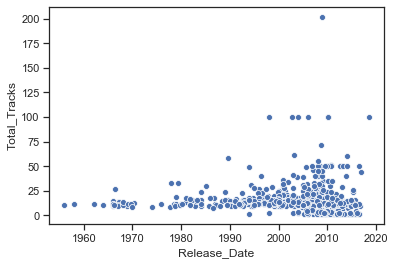

In [60]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Release_Date", y="Total_Tracks",
                     palette=cmap, sizes=(10, 200),
                     data=Albums)